In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model #線性回歸
from sklearn.preprocessing import PolynomialFeatures #多項式回歸
from sklearn.pipeline import make_pipeline #多項式回歸
from sklearn.datasets import make_regression  #資料集
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_regression(n_samples=100, n_features=1 ,noise=20) 
#導入資料 samples導入樣本量 fratures 資料維度 noise 噪音噪點 or 資料散佈狀況 干擾值

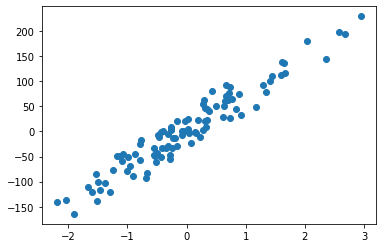

In [3]:
plt.scatter(X,y)

In [4]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) #拆分訓練與測試 測試三成 

# Simple Linear Regression 簡單線性回歸

In [5]:
regr=linear_model.LinearRegression() #線性模型 線性回歸
regr.fit(X_train, y_train) #放進資料集

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

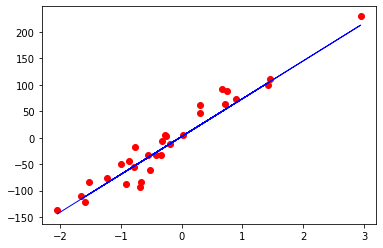

In [6]:
#plt.scatter(X_train, y_train ,color='black') #訓練集資料圖型
plt.scatter(X_test, y_test ,color='red') #測試集資料圖型
#plt.scatter(X_test, regr.predict(X_test),color='blue') #建立好的模型 查看目前對測試集的表現
plt.plot(X_test, regr.predict(X_test),color='blue',linewidth=1) #畫成one-line
plt.show()

In [7]:
w_0=regr.intercept_ #截距項=y點到0的距離  y=ax+b b是截距 a是斜率
w_1=regr.coef_ #係數 斜率 

In [8]:
print('Intercept:  ',w_0) 
print('Coefficient: ',w_1)

Intercept:   2.2050789242153837
Coefficient:  [71.52789445]


In [9]:
regr.score(X_train, y_train) #訓練集測試準確度

0.9223687624844518

In [10]:
regr.score(X_test, y_test) #測試集測試準確度

0.9288509967717717

# Gradient Descent 梯度下降法

In [11]:
#parameters 參數
alpha=0.001  #α #learning rate 學習率
repeats=100  #重複

#Initializing variables 初始變量化
w0=0
w1=0
errors=[] #錯誤
points=[] #點數

In [12]:
for j in range(repeats):
    error_sum=0
    squared_error_sum=0
    error_sum_x=0
    for i in range(len(X_train)): 
        predict=w0+(X_train[i]*w1) #predict 預測 #y(X)=w0+w1X
        squared_error_sum=squared_error_sum+(y_train[i]-predict)**2 #平方錯誤和 
        error_sum=error_sum+y_train[i]-predict                  #公式 w0 <- w0+alpha*sum(yj-hw(Xj))    
        error_sum_x=error_sum_x+(y_train[i]-predict)*X_train[i] #公式 w1 <-w1+alpha*sum(yj-hw(Xj))Xj
        #print(predict,squared_error_sum,error_sum,error_sum_x)   
    w0=w0+(alpha*error_sum)
    w1=w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))
print('w0: %2f'%w0)
print('w1: %2f'%w1)

w0: 2.233145
w1: 71.485939


In [13]:
predicts=[]
mean_error=0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)

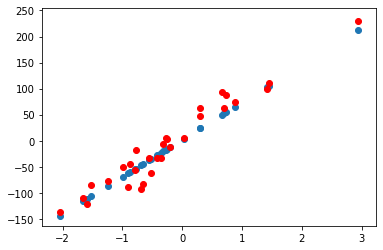

In [14]:
plt.scatter(X_test,predicts)
plt.scatter(X_test,y_test,color='red')
plt.show()

# Polynomial Regression 多項式回歸

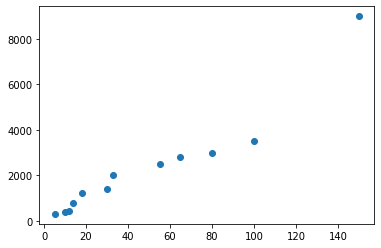

In [15]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show()

In [16]:
series_dict={'X':size,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X']]
y=df[['y']]

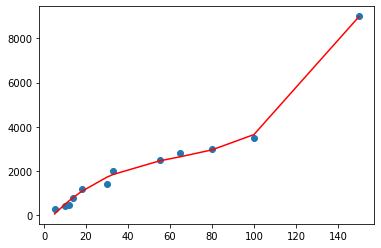

In [17]:
model=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression()) #PolynomialFeatures(3)等於 3維度
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')

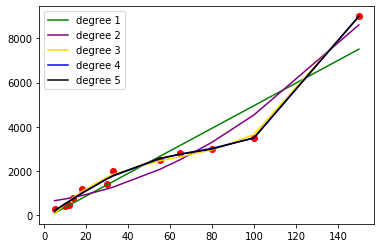

In [18]:
scores=[]
colors=['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count,degree in enumerate([1,2,3,4,5]): #1次方 放到5次方
    model=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression()) 
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color=colors[count],label='degree %d'%degree)

plt.legend(loc=2)
plt.show()

In [98]:
scores

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695324]

# Multivariable Regression 多變量回歸

In [19]:
X,y=make_regression(n_samples=100, n_features=5, noise=20)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
regr.intercept_

9.7748734993692

In [23]:
regr.coef_

array([104.92788407,  57.53967109,  37.46773969,  27.87646014,
        31.80354982])

In [24]:
regr.score(X_train,y_train)

0.8873170499202433

In [25]:
regr.score(X_test,y_test)

0.7980411951076684

In [26]:
size=[5,10,12,14,18,30,33,55,65,80,100,150]
distance=[50,20,70,100,200,150,30,50,70,35,40,20]
price=[300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]

In [28]:
series_dict={'X1':size,'X2':distance,'y':price}
df=pd.DataFrame(series_dict)
X=df[['X1','X2']]
y=df[['y']]

In [29]:
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regr.score(X,y)

0.9071864679091036

In [31]:
regr.intercept_

array([-309.68167455])

In [33]:
regr.coef_

array([[51.94345057,  1.62218727]])

# To Avoid Overfitting 避免過度擬合

1.Lasso Regression min*CF+alpha*sum(|wj|)

2.Ridge Regression min*CF+alpha*sum(wj)平方

In [34]:
X,y=make_regression(n_samples=1000, n_features=10, noise=10)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [36]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print('Training Score: ',regr.score(X_train, y_train))
print('Testing Score: ',regr.score(X_test, y_test))

Training Score:  0.9963730705870304
Testing Score:  0.9964394707481405


In [39]:
clf_lasso=linear_model.Lasso(alpha=0.5) #參數越大 懲罰項越高 不調整預設為1
clf_lasso.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
print('Training Score: ',regr.score(X_train, y_train))
print('Testing Score: ',regr.score(X_test, y_test))

Training Score:  0.9963730705870304
Testing Score:  0.9964394707481405


In [41]:
clf_ridge=linear_model.Ridge(alpha=0.5)
clf_ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
print('Training Score: ',regr.score(X_train, y_train))
print('Testing Score: ',regr.score(X_test, y_test))

Training Score:  0.9963730705870304
Testing Score:  0.9964394707481405


In [43]:
model=make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model.fit(X,y)
model.score(X,y)

0.9997365442495552